In [ ]:
!pip install scikit-learn


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
dataset=pd.read_csv('Copper_Set.xlsx - Result 1.csv')
dataset

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
datas=dataset.copy()
datas

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
material_null=datas['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
datas['material_ref'][replace_null]=np.NaN

In [5]:
datas

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [6]:
# Assuming you have a DataFrame named df
datas.rename(columns={'quantity tons': 'quantity_tons','delivery date':'delivery_date'}, inplace=True)


In [7]:
datas

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [8]:
# Assuming 'dataset' is a Pandas DataFrame
missing_values = datas.isnull().sum()
missing_values


id                    2
item_date             1
quantity_tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery_date         1
selling_price         1
dtype: int64

In [9]:
import numpy as np

# Check for NaN values in the 'quantity_tons' column
missing_values = datas['quantity_tons'].isnull().sum()

# Additionally, check for other common placeholders for missing values
missing_values += (datas['quantity_tons'] == -1).sum()  # Example: If -1 represents missing data
missing_values += (datas['quantity_tons'] == '').sum()  # Example: If empty string represents missing data

print("Total missing values in 'quantity_tons':", missing_values)


Total missing values in 'quantity_tons': 0


In [10]:
# Find and display the indices of rows with null values in the 'quantity_tons' column
null_indices = datas[datas['quantity_tons'].isnull()]
null_indices


,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price


In [11]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
# Convert 'item_date' to a string
datas['item_date'] = datas['item_date'].astype(str)

# Use string slicing to format the date (YYYYMMDD to YYYY-MM-DD)
datas['item_date'] = datas['item_date'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:8]}")

# Now, the 'item_date' column should have the date in the desired format


In [12]:
datas['customer'].fillna(datas['customer'].mean(), inplace = True)
datas['country'].fillna(datas['country'].mean(), inplace = True)
datas['application'].fillna(datas['application'].mean(), inplace = True)
# datas['quantity_tons'].fillna(datas['quantity_tons'].mean(), inplace = True)
datas['thickness'].fillna(datas['thickness'].mean(), inplace = True)
datas['material_ref'].fillna(datas['material_ref'].mode()[0],inplace=True)
datas['selling_price'].fillna(datas['selling_price'].mean(),inplace=True)

In [13]:
datas['delivery_date'] = pd.to_datetime(datas['delivery_date'], format='%Y%m%d', errors='coerce')

In [14]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' with your data
# Replace all values in the 'status' column that are not 'Won' or 'Lost' with NaN
valid_statuses = ['Won', 'Lost']
datas['status'] = np.where(datas['status'].isin(valid_statuses), datas['status'], np.nan)



In [15]:
null_rows = datas[datas['status'].isnull()]
null_rows
# This code creates a new DataFrame called null_rows that contains only the rows where the 'status' column is null, and then it prints this subset of the data.

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,3.522613,30209509.0,30.0,NaN,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,18.00
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,9.17577,30209509.0,30.0,NaN,W,41.0,0.38,1125.0,NBW_L+_1125_0.4,611993,2021-07-01,17.00
14,99659229-166B-4966-AA1F-9796DA6055DB,2021-04-01,10.41135,30271717.0,28.0,NaN,W,10.0,0.60,1250.0,DX51D+Z,611993,2021-07-01,1258.00
18,9CEF626C-6124-4C5C-9D54-0E5B8A8F2782,2021-04-01,16.253987,30271717.0,28.0,NaN,W,10.0,0.80,1250.0,DX51D+Z,611993,2021-07-01,1193.00
22,93B04F7B-0A4C-4D45-AB3A-67DB7888869A,2021-04-01,14.203574,30271717.0,28.0,NaN,W,10.0,0.60,1000.0,DX51D+Z,611993,2021-07-01,1265.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181602,D85912F7-0002-4EC5-9CFD-AD3803F44D91,2020-07-02,20.15511929,30267349.0,84.0,NaN,W,10.0,2.00,1500.0,1S220A100P6FSA,164141591,2020-07-01,619.81
181603,E6A94878-F80E-4852-A217-928D6D9C4A28,2020-07-02,15.74226571,30267349.0,84.0,NaN,W,10.0,2.00,1000.0,1S220A100P6FSA,164141591,2020-07-01,628.52
181604,B40F8127-D4AC-44B6-B200-FED2690EA8EF,2020-07-02,16.39100871,30267349.0,84.0,NaN,W,10.0,2.00,1250.0,1S220A100P6FSA,164141591,2020-07-01,615.81
181606,71B2FEB0-DB4C-47BE-848F-77A7705AB181,2020-07-02,29.49310645,30201589.0,84.0,NaN,S,15.0,0.80,1250.0,DX51D+Z,1668701376,2020-07-01,727.00


In [16]:
datas.dropna(subset=['status'], inplace=True)

In [17]:
datas.dropna(subset=['item_date','id','delivery_date','status'], inplace=True)

In [18]:
datas.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

# Treating outliers and cliping methods

In [19]:
datas['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')

In [20]:
datas.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price
count,150444.000000,1.504450e+05,150445.000000,150445.000000,150445.000000,150445.000000,1.504450e+05,150445.000000
mean,94.459565,3.027510e+07,45.391443,25.194695,2.618382,1297.842842,4.748495e+08,825.771800
std,440.951604,9.455146e+06,24.487975,17.639651,7.115516,266.157674,7.172671e+08,290.894035
min,-2000.000000,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.000000
25%,10.698061,3.019689e+07,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,671.000000
50%,29.934564,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,811.000000
75%,64.867439,3.027982e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,951.000000
max,70252.363070,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,81236.140000


# Quantity_tons

In [21]:
datas['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = datas.quantity_tons.quantile(0.75)
q1 = datas.quantity_tons.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(146.12150552000003, -70.55600534000003)

In [22]:
datas['quantity_tons'] = datas['quantity_tons'].clip(upper_tres,lower_tres)

In [23]:
datas['quantity_tons'].isnull().sum()

1

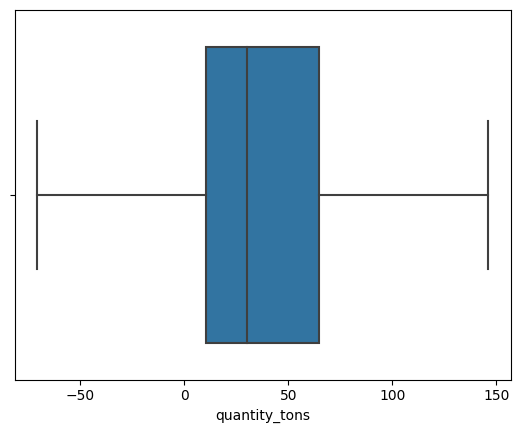

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'datas' with your data
sns.boxplot(x='quantity_tons', data=datas)

# Show the plot
plt.show()


# Application

In [25]:
q3 = datas.application.quantile(0.75)
q1 = datas.application.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(87.5, -36.5)

In [26]:
datas['application'] = datas['application'].clip(upper_tres,lower_tres)

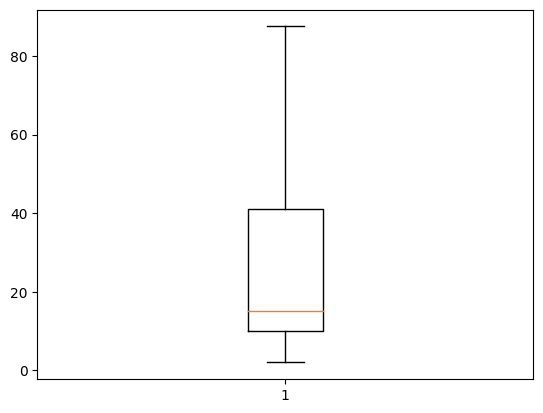

In [27]:
# Creating plot
plt.boxplot(datas['application'])
 
# show plot
plt.show()

# Thickness

In [28]:
q3 = datas.thickness.quantile(0.75)
q1 = datas.thickness.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(6.39, -2.6499999999999995)

In [29]:
datas['thickness'] = datas['thickness'].clip(upper_tres,lower_tres)

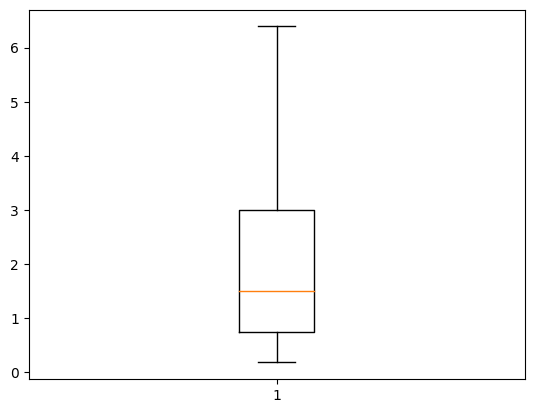

In [30]:
# Creating plot
plt.boxplot(datas['thickness'])
 
# show plot
plt.show()

# width

In [31]:
q3 = datas.width.quantile(0.75)
q1 = datas.width.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1986.0, 690.0)

In [32]:
datas['width'] = datas['width'].clip(upper_tres,lower_tres)

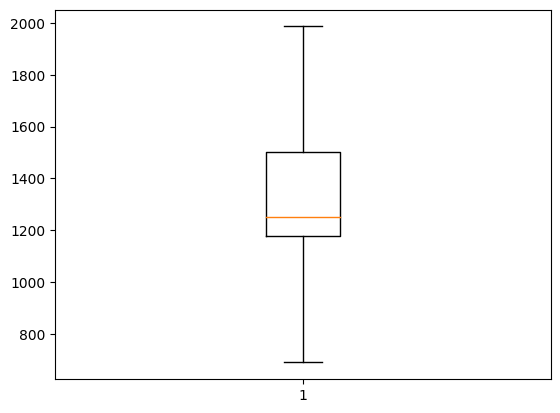

In [33]:
# Creating plot
plt.boxplot(datas['width'])
 
# show plot
plt.show()

# selling price

In [34]:
q3 = datas.selling_price.quantile(0.75)
q1 = datas.selling_price.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1371.0, 251.0)

In [35]:
datas['selling_price'] = datas['selling_price'].clip(upper_tres,lower_tres)

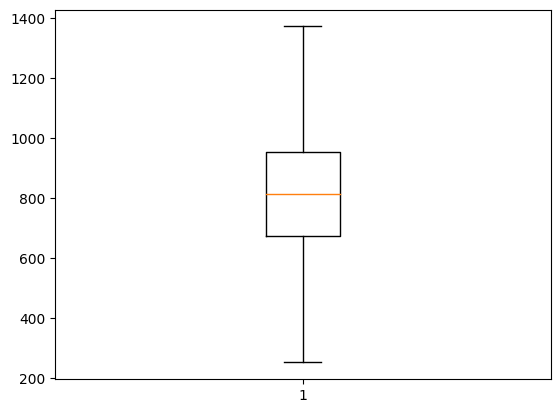

In [36]:
# Creating plot
plt.boxplot(datas['selling_price'])
 
# show plot
plt.show()

# skewness

In [85]:
Skewness:

Definition: Skewness measures the asymmetry of the probability distribution of a dataset. 
It quantifies how the data is distributed in terms of its shape and whether it is symmetric or not.

Purpose: Skewness helps you understand the shape of the data distribution. 
It tells you if the data is more concentrated on one side of the mean or if it's evenly distributed. 
Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

SyntaxError: unterminated string literal (detected at line 7) (1241201636.py, line 7)

<Figure size 800x600 with 0 Axes>

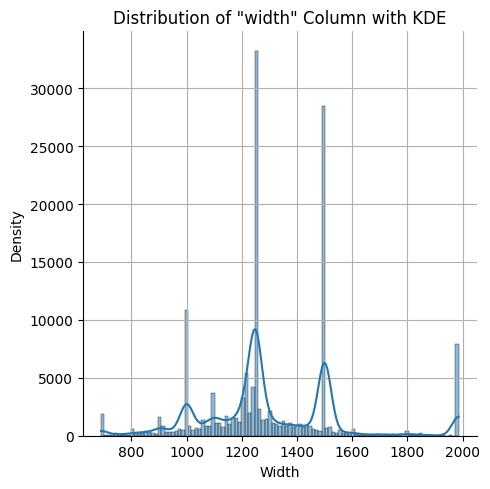

In [86]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['width'], kde=True)
plt.xlabel('Width')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

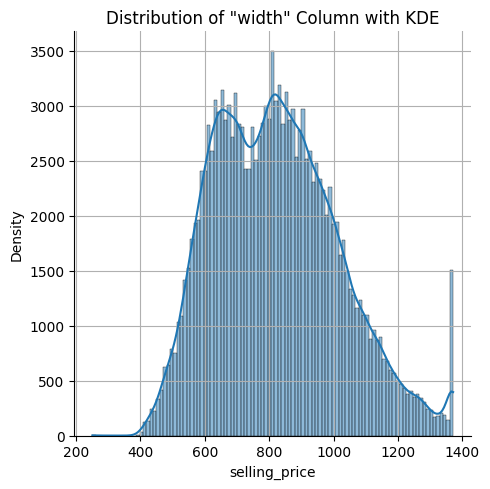

In [87]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['selling_price'], kde=True)
plt.xlabel('selling_price')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

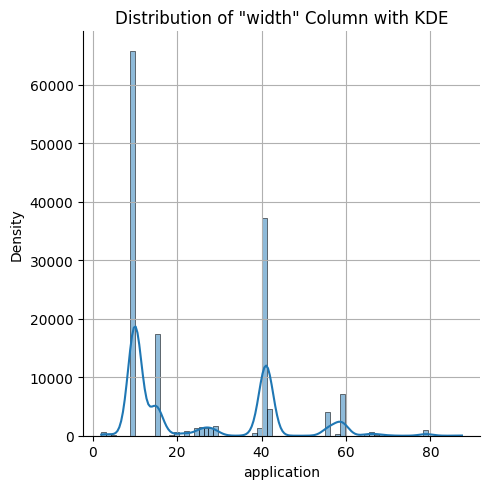

In [88]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['application'], kde=True)
plt.xlabel('application')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

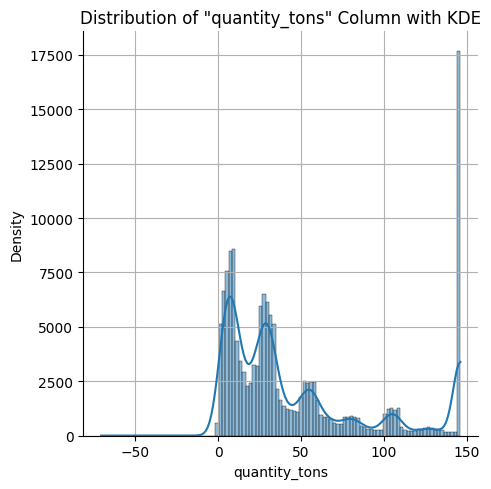

In [89]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['quantity_tons'], kde=True)
plt.xlabel('quantity_tons')
plt.ylabel('Density')
plt.title('Distribution of "quantity_tons" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

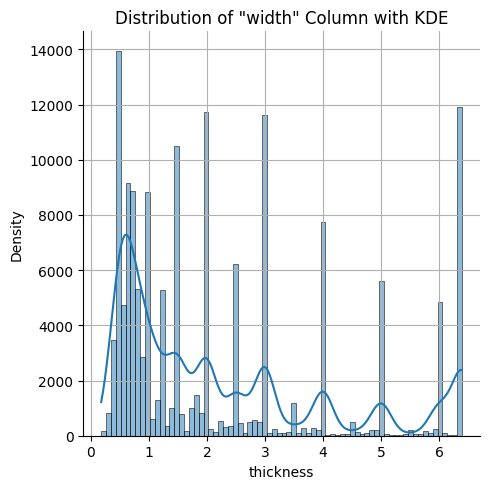

In [90]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['thickness'], kde=True)
plt.xlabel('thickness')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Treating skewness

In [146]:
Identify Skewness:

    Begin by visually inspecting your data using histograms, density plots, or 
    skewness coefficients to determine whether skewness is present and its direction (positive or negative).
    Choose Appropriate Transformation:

Select a transformation method based on the type of skewness:
Positive Skewness (Right Skewed):
     Apply a logarithmic transformation (e.g., natural logarithm or base 10).
    Try a square root transformation.
    Consider a Box-Cox transformation if appropriate.
Negative Skewness (Left Skewed):
    Consider an inverse transformation (e.g., 1/x).

If this value is between: -0.5 and 0.5, the distribution of the value is almost symmetrical.
-1 and -0.5, the data is negatively skewed, 
 and 
f it is between 0.5 to 1, 
the data is positively skewed. The skewness is moderate

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [ ]:
# Positive skewness (Right Skewed)
log_transformed_data = np.log(data)
sqrt_transformed_data = np.sqrt(data)

# Negative skewness 
inverse_transformed_data = 1 / data

# If this value is between: -0.5 and 0.5, the distribution of the value is almost symmetrical.

# -1 and -0.5, the data is negatively skewed,and

# f it is between 0.5 to 1, the data is positively skewed.

In [37]:
datas['thickness_log'] =np.log(datas['thickness'])

In [38]:
datas['thickness'].skew(),datas['thickness_log'].skew()

(1.0135000929498768, 0.07022966574220478)

In [39]:
datas['width'].skew()

0.6579516122229954

In [40]:
datas['selling_price'].skew()# This is normally symmertrical so no need transformation

0.45101629104824387

In [41]:
print(datas['quantity_tons'].isnull().sum())


1


In [42]:
print(datas['quantity_tons'].dtype)


float64


In [43]:
datas['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')


In [44]:
datas['quantity_tons_log']=np.log(datas['quantity_tons'])

In [45]:
datas['quantity_tons_log'].isnull().sum()

4

In [49]:
nan_rows = datas[datas['quantity_tons_log'].isnull()]
print(nan_rows[['quantity_tons', 'quantity_tons_log']])


Empty DataFrame
Columns: [quantity_tons, quantity_tons_log]
Index: []


In [48]:
datas.dropna(inplace=True)

In [50]:
datas['quantity_tons'].skew(),datas['quantity_tons_log'].skew()

(1.1044651132279362, -0.7771256048440671)

In [51]:
datas['quantity_tons_log'].fillna(datas['quantity_tons_log'].mean(), inplace = True)

In [52]:
datas['application'].skew()

0.7348934157417811

<Axes: xlabel='thickness_log', ylabel='Density'>

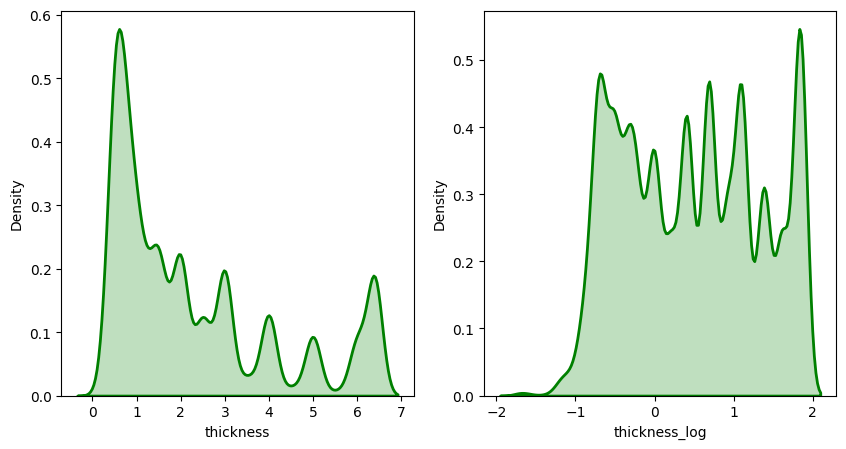

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['thickness'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['thickness_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='application', ylabel='Density'>

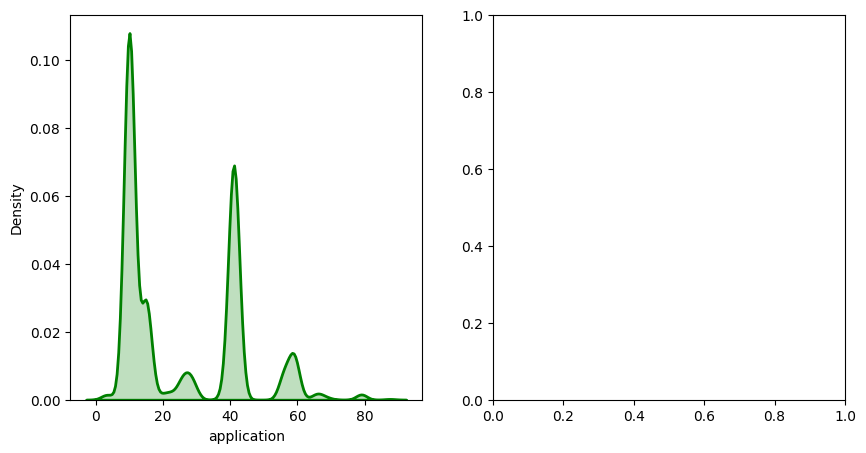

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['application'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])

<Axes: xlabel='quantity_tons_log', ylabel='Density'>

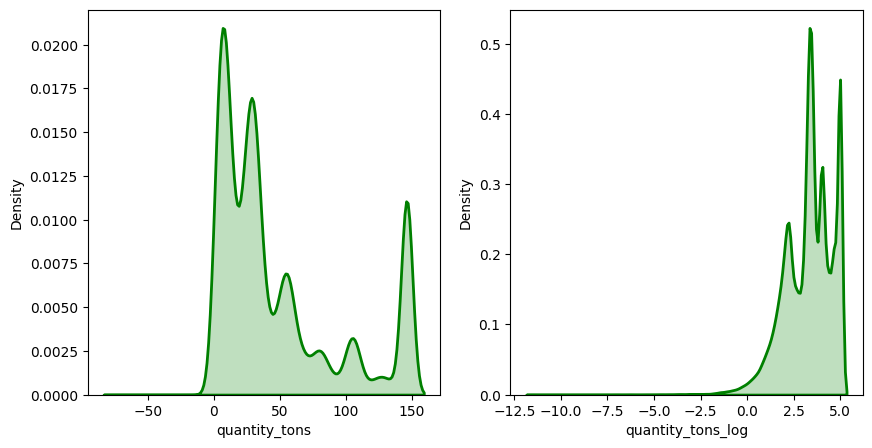

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['quantity_tons'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['quantity_tons_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='width', ylabel='Density'>

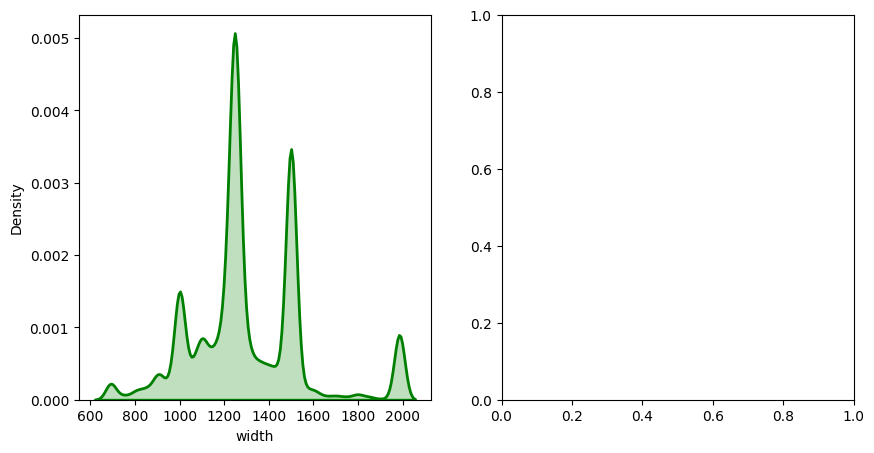

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['width'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])

<Axes: xlabel='selling_price', ylabel='Density'>

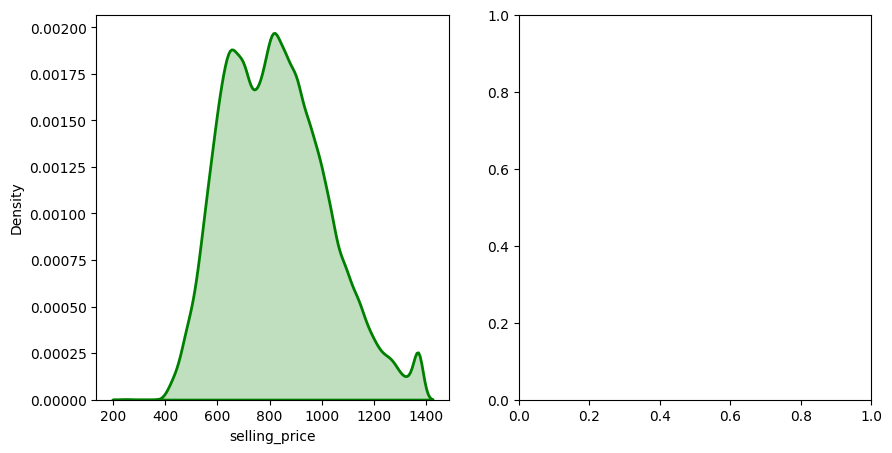

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])

# Encoding

In [54]:
One-Hot Encoding: One-hot encoding is a popular technique where each category is converted into a binary vector. Each category is represented by a unique column, and the presence of a category is indicated by a 1 in the corresponding column, while all other columns contain 0s.

Example:
Original categorical column: ["Red", "Green", "Blue"]
One-hot encoded columns:

Red: [1, 0, 0]
Green: [0, 1, 0]
Blue: [0, 0, 1]
    
Label Encoding: Label encoding involves assigning a unique integer to each category. 
This method is suitable for ordinal data, where there is an inherent order among categories.
However, it may not be suitable for nominal data.

Example:
Original categorical column: ["Low", "Medium", "High"]
Label encoded column: [0, 1, 2]

Binary Encoding: Binary encoding combines the advantages of one-hot encoding and label encoding. 
It converts categories into binary code and then encodes them as integers.
It can be more memory-efficient than one-hot encoding.

Ordinal Encoding: Ordinal encoding is used when there is a clear order or ranking among categories.
Categories are mapped to integers according to their order.

Example:
Original categorical column: ["Low", "Medium", "High"]
Ordinal encoded column: [0, 1, 2]

The choice of encoding method depends on the nature of the data, the machine learning algorithm being used, and 
the specific problem you are trying to solve. Choosing the right encoding method is crucial to ensure that 
the encoded data represents the underlying information accurately and does not introduce biases into your
machine learning models.

SyntaxError: invalid decimal literal (3254163823.py, line 1)

In [53]:
one_hot_encoded = pd.get_dummies(datas, columns=['item type'], drop_first=True)
one_hot_encoded


,id,item_date,quantity_tons,customer,country,status,application,thickness,width,material_ref,...,delivery_date,selling_price,thickness_log,quantity_tons_log,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,10.0,2.00,1500.0,DEQ1 S460MC,...,2021-07-01,854.00,0.693147,3.991779,0,0,0,0,1,0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,146.121506,30202938.0,25.0,Won,41.0,0.80,1210.0,DX51D+Z,...,2021-04-01,1047.00,-0.223144,4.984439,0,0,0,0,1,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,146.121506,30153963.0,30.0,Won,28.0,0.38,952.0,S0380700,...,2021-01-01,644.33,-0.967584,4.984439,0,0,0,0,0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,146.121506,30349574.0,32.0,Won,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,...,2021-01-01,768.00,0.832909,4.984439,0,0,1,0,0,0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,146.121506,30211560.0,28.0,Won,10.0,4.00,1986.0,2_S275JR+AR-CL1,...,2021-03-01,577.00,1.386294,4.984439,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,41.0,0.96,1240.0,DX51D+Z,...,2020-07-01,602.00,-0.040822,4.670802,0,0,0,0,1,0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,41.0,0.96,1220.0,DX51D+Z,...,2020-07-01,591.00,-0.040822,4.629691,0,0,0,0,1,0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,146.121506,30200854.0,25.0,Won,41.0,0.95,1500.0,DX51D+Z,...,2020-07-01,589.00,-0.051293,4.984439,0,0,0,0,1,0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,41.0,0.71,1250.0,DX51D+Z,...,2020-07-01,619.00,-0.342490,1.443523,0,0,0,0,1,0


In [54]:
one_hot_encoded.isnull().sum()

id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery_date        0
selling_price        0
thickness_log        0
quantity_tons_log    0
item type_Others     0
item type_PL         0
item type_S          0
item type_SLAWR      0
item type_W          0
item type_WI         0
dtype: int64

In [55]:
datas.isnull().sum()

id                   0
item_date            0
quantity_tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery_date        0
selling_price        0
thickness_log        0
quantity_tons_log    0
dtype: int64

In [56]:
# Find and display the row(s) with null values in the 'quantity_tons' column
null_rows = datas[datas['quantity_tons'].isnull()]
null_rows

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,thickness_log,quantity_tons_log


# Model Building and Evaluation

# Split the dataset into training and testing/validation set

In [57]:
# independent features after encoding
X = one_hot_encoded[[ 'thickness_log', 'width',
       'quantity_tons_log', 'application', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI']].values#important feature

y=datas[['status']].values#predicted targets

In [58]:
be = LabelBinarizer()
be.fit(y)
Y_fit = be.fit_transform(y)

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X,Y_fit, test_size=0.1, random_state=42)

In [68]:
# Building the model
extra_tree_model_class = ExtraTreesClassifier()
extra_tree_model_class.fit(X_train, y_train)

ExtraTreesClassifier()

In [79]:
y_pred = extra_tree_model_class.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.7980059820538384
Confusion Matrix:
[[ 1726  1691]
 [ 1348 10280]]


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      3417
           1       0.86      0.88      0.87     11628

    accuracy                           0.80     15045
   macro avg       0.71      0.69      0.70     15045
weighted avg       0.79      0.80      0.79     15045



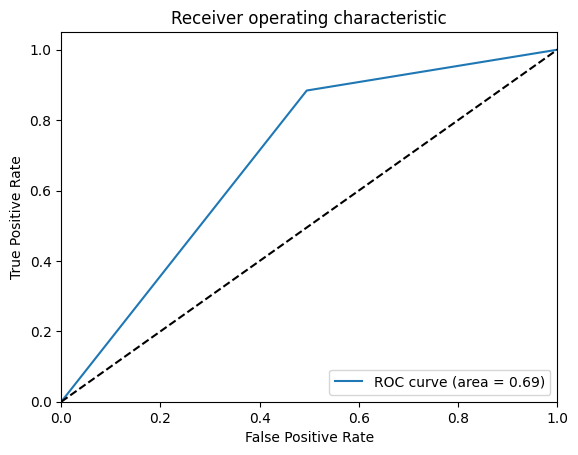

In [72]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [74]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(extra_tree_model_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(one_hot_encoded, f)

In [ ]:
'thickness_log', 'width',
       'quantity_tons_log', 'application', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI'

In [76]:
one_hot_encoded

,id,item_date,quantity_tons,customer,country,status,application,thickness,width,material_ref,...,delivery_date,selling_price,thickness_log,quantity_tons_log,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,10.0,2.00,1500.0,DEQ1 S460MC,...,2021-07-01,854.00,0.693147,3.991779,0,0,0,0,1,0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,146.121506,30202938.0,25.0,Won,41.0,0.80,1210.0,DX51D+Z,...,2021-04-01,1047.00,-0.223144,4.984439,0,0,0,0,1,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,146.121506,30153963.0,30.0,Won,28.0,0.38,952.0,S0380700,...,2021-01-01,644.33,-0.967584,4.984439,0,0,0,0,0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,146.121506,30349574.0,32.0,Won,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,...,2021-01-01,768.00,0.832909,4.984439,0,0,1,0,0,0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,146.121506,30211560.0,28.0,Won,10.0,4.00,1986.0,2_S275JR+AR-CL1,...,2021-03-01,577.00,1.386294,4.984439,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,41.0,0.96,1240.0,DX51D+Z,...,2020-07-01,602.00,-0.040822,4.670802,0,0,0,0,1,0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,41.0,0.96,1220.0,DX51D+Z,...,2020-07-01,591.00,-0.040822,4.629691,0,0,0,0,1,0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,146.121506,30200854.0,25.0,Won,41.0,0.95,1500.0,DX51D+Z,...,2020-07-01,589.00,-0.051293,4.984439,0,0,0,0,1,0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,41.0,0.71,1250.0,DX51D+Z,...,2020-07-01,619.00,-0.342490,1.443523,0,0,0,0,1,0


In [78]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[0.832909,1500.0,4.984439,59.0,0,0,0,0,1]])
# new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
# new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = extra_tree_model_class.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won
